# Data 200 Project 1 – Apple Stock Analysis
**Student Name:** Grace Ngo  
**Course:** Data 200 - Data Systems for Data Analytics   
**Project:** 1 — Data Wrangling, Aggregation & Visualization 

---

## 1. Introduction & Objective
This project presents a comprehensive exploratory data analysis of Apple Inc. (AAPL) stock prices.
Using daily Open, High, Low, Close, Adjusted Close, and Volume (OHLCV) data, we explores long-term performance trends, trading activity, and statistical relationships between price and volume.
The goal is to demonstrate fundamental data analysis skills — cleaning, summarizing, visualizing, and interpreting financial time-series data — using Python and pandas.


Goals:
- Understand how Apple’s stock price has evolved over time.
- Identify yearly patterns in price levels and trading activity.
- Examine whether stock price movements relate to trading volume.
- Practice data cleaning, aggregation, and visualization in a reproducible workflow.

---

# Exercises

Before analyzing the data, we first run these code below

In [534]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

**Excercise 1:** Import the data into a Jupyter notebook and print the first 5 rows.

In [577]:
## Import the data 
df= pd.read_csv('apple_stock.csv')

## Print the first 5 rows
print(df.head())

   Unnamed: 0  Adj Close     Close      High       Low      Open     Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600


In [578]:
## Clean the data
df.columns = [col.strip().replace(' ','_') for col in df.columns]

## Rename column 'Unnamed: 0' into 'Date'
if 'Date' not in df.columns and 'Unnamed:_0' in df.columns:
    df = df.rename(columns = {'Unnamed:_0': 'Date'})
    
df['Date'] = pd.to_datetime(df['Date'])

## Print the first 5 rows after rename & cleaning
print(df.head())

        Date  Adj_Close     Close      High       Low      Open     Volume
0 1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1 1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2 1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3 1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4 1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600


**Excercise 2:** Retrieve general information about the data using info.

In [579]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11107 non-null  datetime64[ns]
 1   Adj_Close  11107 non-null  float64       
 2   Close      11107 non-null  float64       
 3   High       11107 non-null  float64       
 4   Low        11107 non-null  float64       
 5   Open       11107 non-null  float64       
 6   Volume     11107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 607.5 KB
None


**Excercise 3:** Create a set of descriptive statistics for the data.

In [580]:
print(df.describe())

                                Date     Adj_Close         Close  \
count                          11107  11107.000000  11107.000000   
mean   2002-12-14 15:31:54.576393216     23.522229     24.357607   
min              1980-12-12 00:00:00      0.037815      0.049107   
25%              1991-12-05 12:00:00      0.243402      0.300290   
50%              2002-12-10 00:00:00      0.446682      0.542411   
75%              2013-12-19 12:00:00     18.260086     21.397143   
max              2025-01-03 00:00:00    259.019989    259.019989   
std                              NaN     49.767881     50.217498   

               High           Low          Open        Volume  
count  11107.000000  11107.000000  11107.000000  1.110700e+04  
mean      24.598169     24.092608     24.339076  3.154341e+08  
min        0.049665      0.049107      0.049665  0.000000e+00  
25%        0.306362      0.292411      0.300090  1.111164e+08  
50%        0.553393      0.534598      0.542679  2.036944e+08  
75%

**Excercise 4:** Determine whether the tabular data is TidyData.               

In [582]:
## Check if each observation forms one row
df.Date.is_unique

True

In [583]:
## Check if there is any NULL (which is no value) in each cell
df.isnull().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [584]:
## Check if there are any duplicates or combined entries (which is more than 1 value) in each cell
df.duplicated().sum()

np.int64(0)

**Excercise 5:** If it is TidyData, explain how it meets each of the 3 traits. If it is not, apply transformations to make it TidyData.

The dataset is TidyData because it satisfies the three key principles of tidy data organization:

1. Each variable forms a column: Each column in the dataset represents a single variable (Date, Open, High, Low, Close, etc.).
  
2. Each observation forms a row: Each row in the dataset represents a single observation — in this case, daily record. By using df.Date.is_unique, the result returned True, which confirms that every row corresponds to one unique observation (date) and that no observation is spread across multiple rows.
  
3. Each observational unit (stock) forms a table: By using df.isnull().sum(), and df.duplicated().sum(), the result returns 0 for both functions, which means none of these checks indicated multi-value cells or NULL or duplication, confirming that each cell holds a single atomic value.

Based on these verifications, the dataset follows all three tidy data principles — variables are organized in columns, observations are represented as rows, and values are atomic in each cell. 

**Excercise 6:** Within your dataset, group the data based upon a variable and calculate 3 different aggregations. If your data are not suitable to grouping, just calculate the 3 aggregations for the whole dataset. What do these aggregations suggest about the data?

In [590]:
## Add a year column
df['Year'] = df['Date'].dt.year

## Calculate 3 different aggregations in Price levels and Trading Activities yearly
yearly_stats = df.groupby('Year').agg({'Close': 'mean','Volume': 'median','High': 'max'}).reset_index()
print(yearly_stats.head())

   Year     Close       Volume      High
0  1980  0.135903   68880000.0  0.161272
1  1981  0.108548   26320000.0  0.155134
2  1982  0.085459   66080000.0  0.155692
3  1983  0.167274  133996800.0  0.282366
4  1984  0.119651  139843200.0  0.153460


**Interpretation:** The yearly averages show how Apple’s price and trading activity have changed over time.
- The average closing price (Close) represents the general level of Apple’s stock price in each year, giving an idea of its central tendency.
- The median trading volume (Volume) reflects the typical number of shares traded per day, indicating how active and liquid the stock was during that year.
- The maximum high price (High) captures the highest price Apple’s stock reached in each year, showing the yearly peak.

**What this suggests:**
Over the years, the average and maximum prices steadily increase, suggesting strong long-term growth in Apple’s market value.
Meanwhile, median volume fluctuates, indicating that trading activity varies — investors trade more during periods of high attention (like earnings announcements or product releases).

**Excercise 7:** Create two different types of visualizations with your dataset. These must be different kinds of visualizations (ex. scatterplot and histogram, not two histograms). Label them appropriately. Outline what they mean.

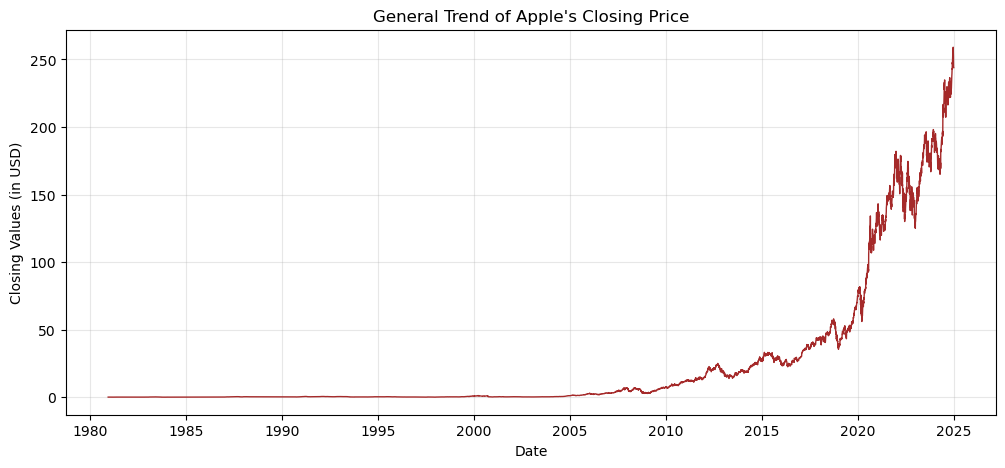

In [591]:
## General Trend of Apple's Closing Market Over Time
fig = plt.subplots(figsize=(12,5))
plt.plot(df['Date'], df['Close'], color = 'brown', linewidth = 1)
plt.title("General Trend of Apple's Closing Price")
plt.ylabel('Closing Values (in USD)')
plt.xlabel('Date')
plt.grid(alpha=0.3)
plt.show()

**Outline:** The plot visualizes the general trend of Apple’s closing market price over time.
From 1980 through 2025, the plot shows a steady upward trajectory, with occasional short-term dips.
This consistent rise indicates a long-term increase in Apple’s stock value, reflecting both the company’s growth and strong investor confidence.

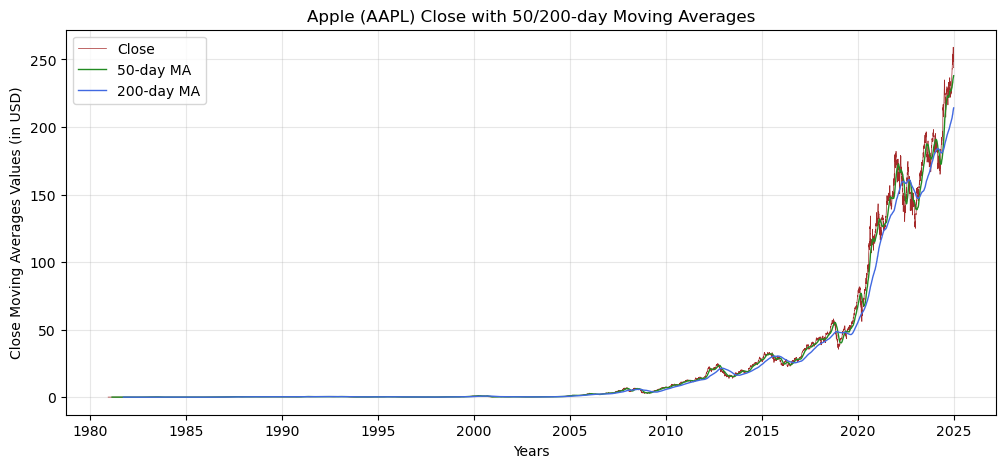

In [592]:
## Additional Plot (Optional): Apple Close Moving Averages within 50/200-day
df['ma_50'] = df['Close'].rolling(50).mean()
df['ma_200'] = df['Close'].rolling(200).mean()

fig = plt.subplots(figsize=(12,5))
plt.plot(df['Date'], df['Close'], label='Close', color = 'brown', linewidth = 0.5)
plt.plot(df['Date'], df['ma_50'], label='50-day MA', color = 'forestgreen', linewidth = 1)
plt.plot(df['Date'], df['ma_200'], label='200-day MA', color = 'royalblue', linewidth = 1)
plt.title('Apple (AAPL) Close with 50/200-day Moving Averages')
plt.xlabel('Years')
plt.ylabel('Close Moving Averages Values (in USD)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Outline:** This plot visualizes Apple’s closing stock prices over time with two trend indicators: the 50-day and 200-day moving averages (MAs). The brown line represents the daily closing price, while the green and blue lines represent the short-term (50-day) and long-term (200-day) moving averages, respectively.

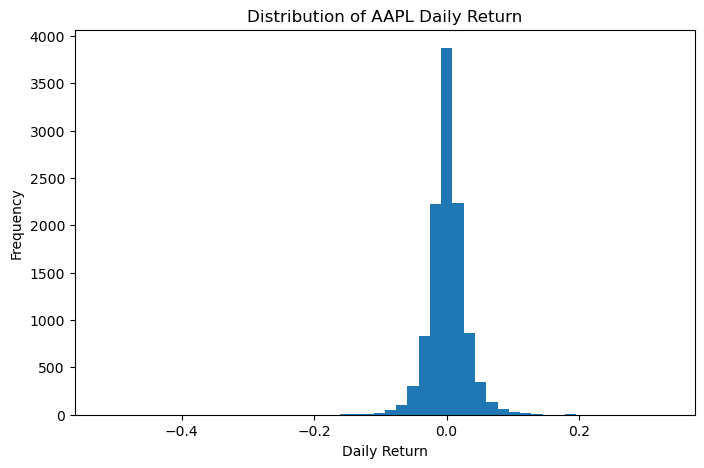

In [593]:
## Apple's Daily Returns
df['daily_return'] = df['Close'].pct_change()
fig = plt.subplots(figsize=(8,5))
plt.hist(df['daily_return'], bins=50)  
plt.title('Distribution of AAPL Daily Return')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

**Outline:** The histogram displays the distribution of Apple’s daily returns.
It shows that most daily returns are centered around 0%, indicating that on most days, Apple’s stock experiences small price movements - consistent with a stable, mature stock.
The shape is tall and narrow, confirming that small daily changes are far more common than large jumps. 

**Excercise 8:** Examining your data and determine if a relationship exists between two of the variables.
If your data are not suited to that task, determine if a general trend or pattern is present.
Write up your findings (250 words).

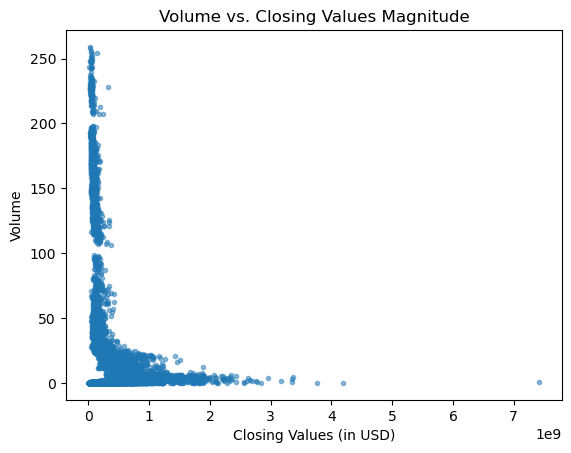

Correlationship between Price and Volumn of Apple's Stock: -0.264


In [594]:
## Examine the relationship between price and volume
plt.scatter(df['Volume'],df['Close'], marker = '.', alpha = 0.5)
plt.title("Volume vs. Closing Values Magnitude")
plt.xlabel('Closing Values (in USD)')
plt.ylabel('Volume')
plt.show()

corr = df['Volume'].corr(df['Close'])
print("Correlationship between Price and Volumn of Apple's Stock:", round(corr,3))

**Interpretation:** The scatter plot examines the relationship between trading volume and closing price for Apple's stock. Each point represents a single trading day, with volume on the x-axis and closing price on the y-axis. The correlation coefficient of -0.264 indicates a weak negative relationship, suggesting that higher trading volumes tend to coincide with slightly lower prices, while higher prices are often associated with reduced trading activity. The downward pattern seen in the plot reflects this modest inverse relationship. However, the weakness of the correlation implies that volume alone explains very little of the variation in price; other market factors play a much larger role, such as market sentiment, earnings reports, and broader economic conditions. 

A closer examination of the plot shows a clear outlier—a point where trading volume is unusually high compared to all other days, while the price is relatively low. This likely represents a day where market activity is extrodinary, such as an earnings announcement, product release, or a macroeconomic shock affecting investor sentiment. Outliers like this can distort correlations and reduce the strength of linear relationships, which explains why the overall coefficient remains modest even though extreme points exist.

The presence of such an outlier highlights the reactive nature of markets: investors trade heavily when new information enters, often leading to temporary price drops or surges. This event-driven volatility shows that short-term volume spikes reflect collective reactions rather than gradual trends.

In conclusion, while the main relationship between Apple’s price and volume is weakly negative, the outlier emphasizes that isolated high-volume events are driven by market shocks or significant news, not by normal trading behavior. These rare events deserve separate analysis to understand Apple’s sensitivity to major information releases.

**Excercise 9:** Evaluate based upon the current methods how confident you can be with this hypothesis
and map out some next steps of how you might go about more credibly (150 words).

The current analysis provides only moderate confidence in the hypothesis that Apple’s stock price and trading volume are negatively related. The weak correlation (–0.264) and visible dispersion in the scatter plot suggest that this relationship is not statistically strong and may be influenced by a few extreme events. Because the analysis relies solely on daily aggregated data and a simple linear correlation, it overlooks potential nonlinear patterns, lag effects, and contextual market factors.

Analyzing data over different time intervals (weekly, monthly) and testing correlations during specific market conditions, such as earnings weeks or macroeconomic announcements can be used to strengthen credibility. Volatility and investor sentiment variables are also needed to control for broader influences. Finally, applying regression could determine whether volume meaningfully predicts price changes. These steps would yield a more robust and causally informative understanding of the price–volume relationship.

**Excercise 10:** Write a brief statement on what additional data you may need in your analysis. Where
could you possibly locate it? (100 words)

Additional data such as intraday trading information, news sentiment scores, and macroeconomic indicators would be valuable to enhance the analysis. Intraday price and volume data would reveal short-term market dynamics and help identify whether volume spikes precede or follow price changes. News sentiment data from APIs like NewsAPI or RavenPack could contextualize trading activity around announcements. Including market-wide indicators such as the S&P 500 index or interest rate changes from sources like Yahoo Finance or FRED would also help isolate Apple-specific effects from broader economic influences, resulting in a more comprehensive and credible analysis.